In [2]:
import networkx as nx
import matplotlib.pyplot as plt

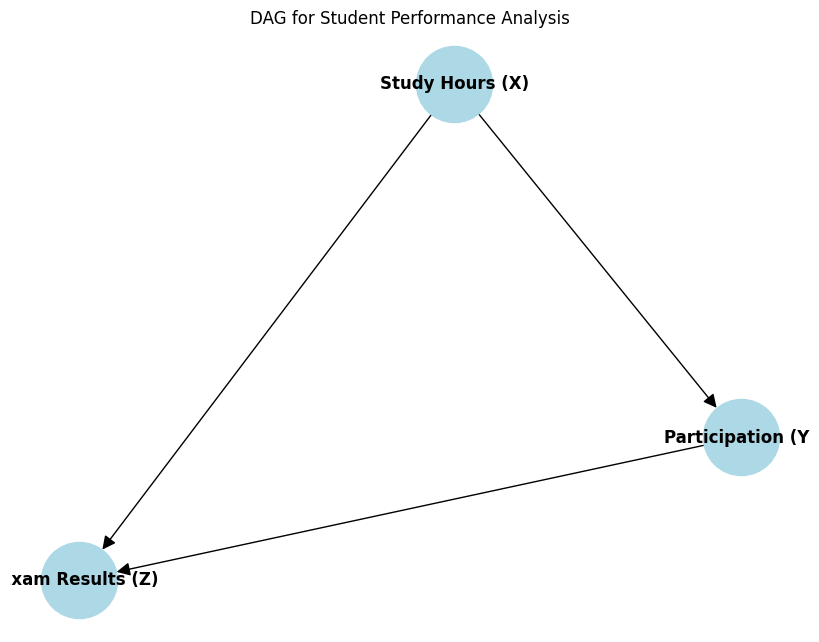

In [3]:
# DAG = Directed Acyclic Graph 
dag = nx.DiGraph()
dag.add_edges_from([("Study Hours (X)", "Participation (Y)"), 
                    ("Study Hours (X)", "Exam Results (Z)"), 
                    ("Participation (Y)", "Exam Results (Z)")])

# plotting graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(dag, seed=42)
nx.draw(dag, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=12, font_weight='bold', arrowsize=20)
plt.title("DAG for Student Performance Analysis")
plt.show()

In [4]:
import numpy as np
import pandas as pd

In [5]:
np.random.seed(42)

In [6]:
# 0,1,2 as study hours for low, medium and high 
# X=Study Hours
study_hours = np.random.choice([0, 1, 2], size=1000, p=[0.3, 0.5, 0.2])

In [7]:
# Y depends on X(study_hours)
participation = [
    np.random.choice([0, 1, 2], p=[0.5, 0.4, 0.1]) if x == 0 else
    np.random.choice([0, 1, 2], p=[0.3, 0.5, 0.2]) if x == 1 else
    np.random.choice([0, 1, 2], p=[0.1, 0.4, 0.5])
    for x in study_hours
]

# Z depends on X and Y 
exam_results = [
    np.random.choice(["Fail", "Pass"], p=[0.8, 0.2]) if x == 0 and y == 0 else
    np.random.choice(["Fail", "Pass"], p=[0.6, 0.4]) if x == 1 or y == 1 else
    np.random.choice(["Fail", "Pass"], p=[0.3, 0.7])
    for x, y in zip(study_hours, participation)
]

# Create a DataFrame
df = pd.DataFrame({
    'X': study_hours,
    'Y': participation,
    'Z': exam_results
})

df.head()

,X,Y,Z
0,1,0,Fail
1,2,2,Fail
2,1,2,Pass
3,1,1,Fail
4,0,1,Fail


Joint Probability Distribution for X, Y and Z

$
P(X,Y,Z)=\frac{Count\ of\ (X=x, Y=y, Z=z)}{Total\ Observations}
$

In [25]:
joint_prob = (
    df.groupby(['X', 'Y', 'Z']).size().div(len(df)).reset_index(name='prob')
)
joint_prob

,X,Y,Z,prob
0,0,0,Fail,0.132
1,0,0,Pass,0.025
2,0,1,Fail,0.081
3,0,1,Pass,0.051
4,0,2,Fail,0.005
5,0,2,Pass,0.025
6,1,0,Fail,0.086
7,1,0,Pass,0.058
8,1,1,Fail,0.149
9,1,1,Pass,0.092


Marginal probability

In [9]:
joint_prob[['prob']].sum()

prob    1.0
dtype: float64

In [10]:
data_t = {'X': [1, 1, 2, 2, 3, 3],
        'Y': [1, 2, 1, 2, 1, 2],
        'prob': [0.1, 0.2, 0.15, 0.25, 0.1, 0.2]}

joint_prob_t = pd.DataFrame(data_t)

marginal_X_groupby = joint_prob_t.groupby('X')['prob'].sum()
print(marginal_X_groupby)

X
1    0.3
2    0.4
3    0.3
Name: prob, dtype: float64


In [11]:
# for X
# adding up all prob of X=x, for each x
marginal_X = joint_prob.groupby('X')['prob'].sum()
print("\nMarginal Probability P(X):")
print(marginal_X)

# for Y
marginal_Y = joint_prob.groupby('Y')['prob'].sum()
print("\nMarginal Probability P(Y):")
print(marginal_Y)

# for Z
marginal_Z = joint_prob.groupby('Z')['prob'].sum()
print("\nMarginal Probability P(Z):")
print(marginal_Z)


Marginal Probability P(X):
X
0    0.319
1    0.482
2    0.199
Name: prob, dtype: float64

Marginal Probability P(Y):
Y
0    0.318
1    0.443
2    0.239
Name: prob, dtype: float64

Marginal Probability P(Z):
Z
Fail    0.59
Pass    0.41
Name: prob, dtype: float64


In [17]:
joint_prob.groupby(['X', 'Z'])['prob']

0     0.132
1     0.025
2     0.081
3     0.051
4     0.005
5     0.025
6     0.086
7     0.058
8     0.149
9     0.092
10    0.062
11    0.035
12    0.003
13    0.014
14    0.043
15    0.027
16    0.029
17    0.083
Name: prob, dtype: float64

`joint_prob.groupby(['X', 'Z'])['prob']` creates subgroups based on the unique combinations of values in these two columns.

Conditional Probability

In [19]:
# conditional probability
# P(Z|X)
Z_given_X = (
    joint_prob.groupby(['X', 'Z'])['prob']
    .sum()
    .div(marginal_X, level='X')
    .reset_index(name='Conditional Probability')
)

print("\nConditional Probability P(Z | X):\n")
print(Z_given_X)


Conditional Probability P(Z | X):

   X     Z  Conditional Probability
0  0  Fail                 0.683386
1  0  Pass                 0.316614
2  1  Fail                 0.616183
3  1  Pass                 0.383817
4  2  Fail                 0.376884
5  2  Pass                 0.623116


Sum Rule

In [20]:
sum_rule_X = joint_prob.groupby('X')['prob'].sum()
assert np.allclose(marginal_X, sum_rule_X), "Sum rule verification failed!"
print("\nSum rule verified successfully for P(X).")


Sum rule verified successfully for P(X).


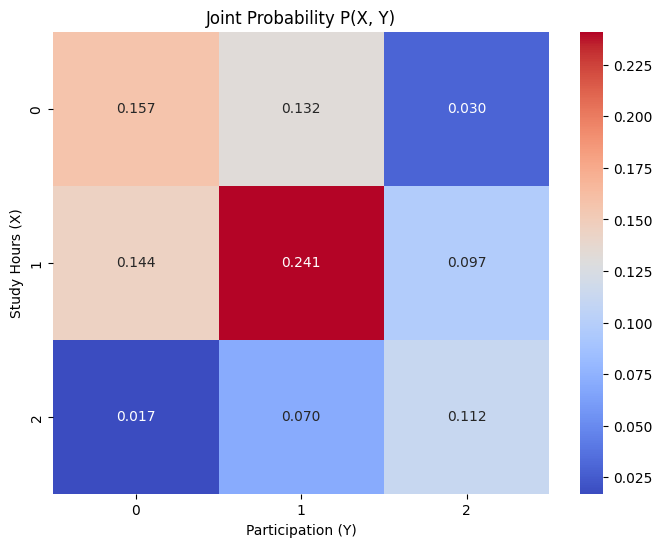

In [21]:
import seaborn as sns

# Heatmap for Joint Distribution of X and Y
pivot_table = joint_prob.pivot_table(
    index='X', 
    columns='Y', 
    values='prob', 
    aggfunc='sum'
)

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", fmt=".3f")
plt.title("Joint Probability P(X, Y)")
plt.ylabel("Study Hours (X)")
plt.xlabel("Participation (Y)")
plt.show()

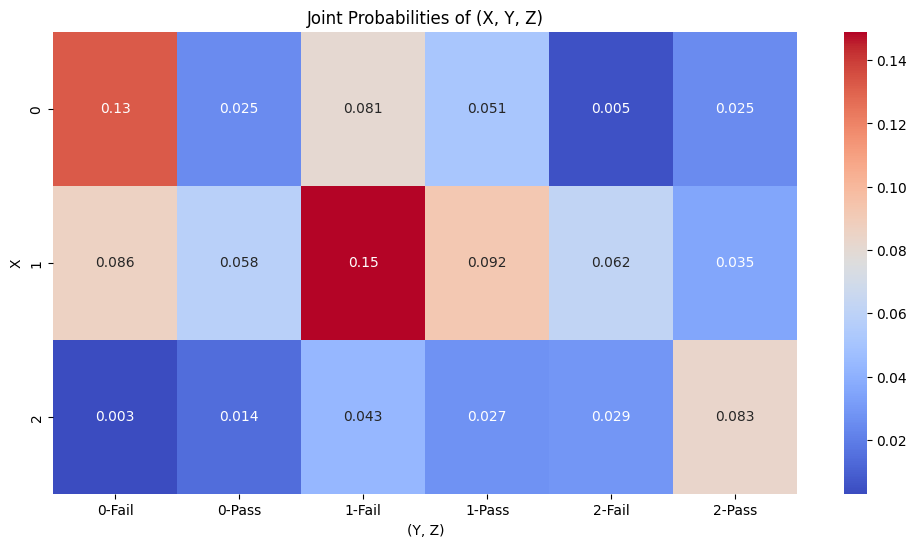

In [22]:
heatmap_data = joint_prob.pivot_table(index="X", columns=["Y", "Z"], values="prob", fill_value=0)

# Heatmap visualization
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", cbar=True)
plt.title("Joint Probabilities of (X, Y, Z)")
plt.xlabel("(Y, Z)")
plt.ylabel("X")
plt.show()

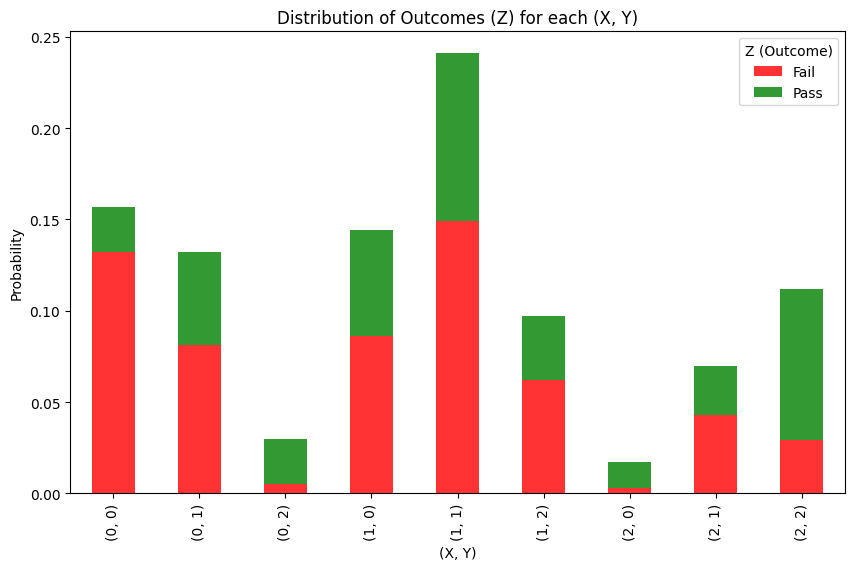

In [26]:
grouped = joint_prob.groupby(["X", "Y", "Z"])["prob"].sum().unstack()

# Stacked bar plot
grouped.plot(kind="bar", stacked=True, color=["red", "green"], alpha=0.8, figsize=(10, 6))
plt.title("Distribution of Outcomes (Z) for each (X, Y)")
plt.ylabel("Probability")
plt.xlabel("(X, Y)")
plt.legend(title="Z (Outcome)")
plt.show()

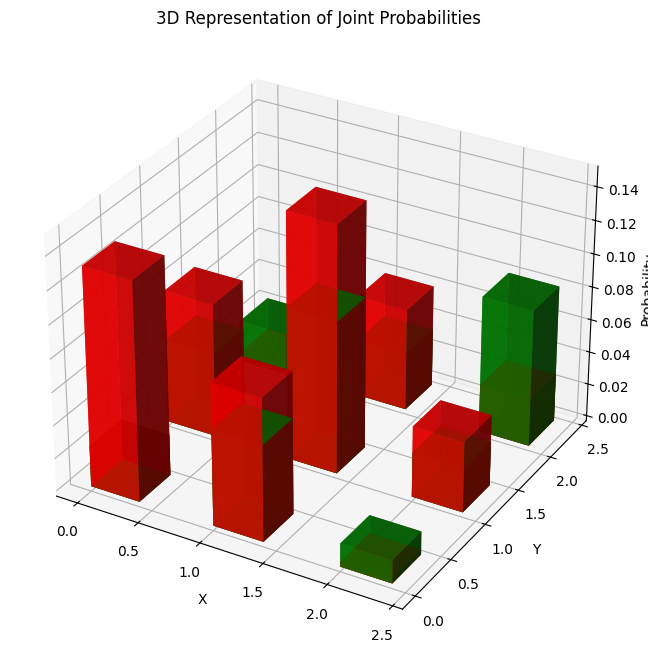

In [27]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# for 3D plotting
x_vals = joint_prob["X"]
y_vals = joint_prob["Y"]
z_vals = joint_prob["prob"]
colors = ["red" if z == "Fail" else "green" for z in joint_prob["Z"]]

# 3D bar plot
ax.bar3d(x_vals, y_vals, np.zeros(len(z_vals)), 0.4, 0.4, z_vals, color=colors, alpha=0.8)

# Labels and title
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Probability")
ax.set_title("3D Representation of Joint Probabilities")
plt.show()